# Adhesin classifier (training)

In [3]:
!rm -r spaan
!git clone https://github.com/nicolagulmini/spaan
!pip install Bio

rm: cannot remove 'spaan': No such file or directory
Cloning into 'spaan'...
remote: Enumerating objects: 255, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 255 (delta 0), reused 3 (delta 0), pack-reused 249
Receiving objects: 100% (255/255), 8.61 MiB | 30.49 MiB/s, done.
Resolving deltas: 100% (138/138), done.


In [4]:
from spaan.data_processing import *
from spaan.Expanded_SPAAN_Model import *
from Bio import SeqIO
import numpy as np
import tensorflow

In [5]:
# load the datasets (it requires about 1 minute)
x, y = process(list(SeqIO.parse("spaan/data/original_adh_dataset.fasta", "fasta")), list(SeqIO.parse("spaan/data/original_negative_dataset.fasta", "fasta")))

In [6]:
x_train, y_train, x_val, y_val, x_test, y_test = split_ds(np.array(x), np.array(y), np.random.permutation(len(x)))
# fix the warning of the nested lists!

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [7]:
# method for fitting in the multi-input neural network
def fit_in_nn(x):
    x_1, x_2, x_3, x_4, x_5, x_6, x_7 = [[] for _ in range(7)]
    for el in x:
        x_1.append(el[0])
        x_2.append(el[1])
        x_3.append(el[2])
        x_4.append(el[3])
        x_5.append(el[4])
        x_6.append(el[5])
        x_7.append(el[6])
    return np.array(x_1), np.array(x_2), np.array(x_3), np.array(x_4), np.array(x_5), np.array(x_6), np.array(x_7)

In [8]:
# model instantiation
espaan_model = Expanded_SPAAN_Model()
max_epochs = 300

In [9]:
my_callbacks = [
    tensorflow.keras.callbacks.EarlyStopping(patience=10)
]

history = espaan_model.get_model().fit(
                                        x=fit_in_nn(x_train),
                                        y=y_train,
                                        batch_size=32, # default
                                        epochs=max_epochs, # the original paper has 10k epochs!
                                        verbose=1, # 1 or 2 to watch the evolution
                                        validation_data=(fit_in_nn(x_val), y_val),
                                        callbacks=my_callbacks,
                                        shuffle=True    
                                        )

Epoch 1/300
18/18 [==============================] - 2s 28ms/step - loss: 0.6827 - accuracy: 0.5526 - val_loss: 0.6651 - val_accuracy: 0.6335
Epoch 2/300
18/18 [==============================] - 0s 8ms/step - loss: 0.6714 - accuracy: 0.6185 - val_loss: 0.6569 - val_accuracy: 0.6335
Epoch 3/300
18/18 [==============================] - 0s 9ms/step - loss: 0.6632 - accuracy: 0.6150 - val_loss: 0.6570 - val_accuracy: 0.6335
Epoch 4/300
18/18 [==============================] - 0s 12ms/step - loss: 0.6689 - accuracy: 0.6150 - val_loss: 0.6569 - val_accuracy: 0.6335
Epoch 5/300
18/18 [==============================] - 0s 9ms/step - loss: 0.6700 - accuracy: 0.6185 - val_loss: 0.6573 - val_accuracy: 0.6335
Epoch 6/300
18/18 [==============================] - 0s 8ms/step - loss: 0.6718 - accuracy: 0.6078 - val_loss: 0.6566 - val_accuracy: 0.6335
Epoch 7/300
18/18 [==============================] - 0s 11ms/step - loss: 0.6660 - accuracy: 0.6221 - val_loss: 0.6571 - val_accuracy: 0.6335
Epoch 8/30

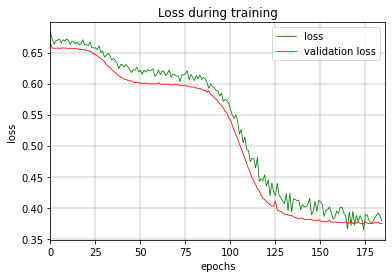

In [10]:
import matplotlib.pyplot as plt

plt.title('Loss during training')
plt.plot(range(len(history.history['loss'])), history.history['loss'], label='loss', ls='-', linewidth=.8, color='green')
plt.plot(range(len(history.history['loss'])), history.history['val_loss'], label='validation loss', ls='-', linewidth=.8, color='red')
plt.grid(color='grey', linewidth=.4)

plt.legend(loc="upper right")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.xlim(0, len(history.history['loss'])+1)
plt.savefig('loss.png')
plt.show()

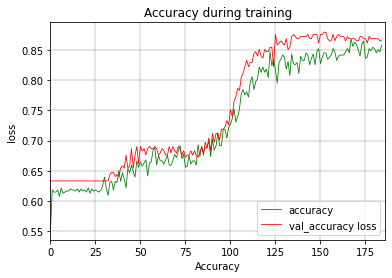

In [11]:
plt.title('Accuracy during training')
plt.plot(range(len(history.history['loss'])), history.history['accuracy'], label='accuracy', ls='-', linewidth=.8, color='green')
plt.plot(range(len(history.history['loss'])), history.history['val_accuracy'], label='val_accuracy loss', ls='-', linewidth=.8, color='red')
plt.grid(color='grey', linewidth=.4)

plt.legend(loc="lower right")
plt.xlabel("Accuracy")
plt.ylabel("loss")
plt.xlim(0, len(history.history['loss'])+1)
plt.savefig('acc.png')
plt.show()

In [12]:
print("Test accuracy: " + str(espaan_model.get_model().evaluate(
    x=fit_in_nn(x_test),
    y=y_test   
    )[1]))

9/9 [==============================] - 0s 3ms/step - loss: 0.3579 - accuracy: 0.8648
Test accuracy: 0.8647686839103699


In [13]:
espaan_model.get_model().save('model.h5')